In [1]:
from marlpde import (write_input_cfg, Solver, Scenario, run_marl_pde, output_data, units)
from pathlib import Path
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [13]:
path = Path("./scenario-a")
build = Path("../../build/")
write_input_cfg(path, Solver(N=200, tmax=200_000, dt=5e-6), Scenario())

In [14]:
run_marl_pde(path, build)

 Xs (cm), Ts (a)   1319.0000000000000        13190.000000000000     
 dt,dx,dtS/dx =   5.0000000000000004E-006   1.8953752843062926E-003   2.6380000000000002E-003
 dx^2/2d=   8.6911926096216638E-007
 scale for MA, MC =  0.68609610165703516       0.34304805082851764     
 scale for c=   6.5313055264747230E-004
 Damkohler number Da=, scaled sedimentation rate,rhos0/rhow=   13190.000000000000        1.0000000000000000        2.7944611504440995     
 scaled length, position of dissolution zone=  0.37907505686125853        3.7907505686125852E-002  0.11372251705837756     
 a/Xs,b/Xs, rhosw-1=  0.26535253528395414        3.7907505686125852E-002   1.7944611504440995     
 1/cXs,Dpor/Dca=   3.7772920769424401E-003   1.3828730315585877E-003
 doing t=  0.25000000000000000     
 doing t=  0.50000000000000000     
 doing t=  0.75000000000000011     
 doing t=   1.0000000000000000     
 fini


STOP marl


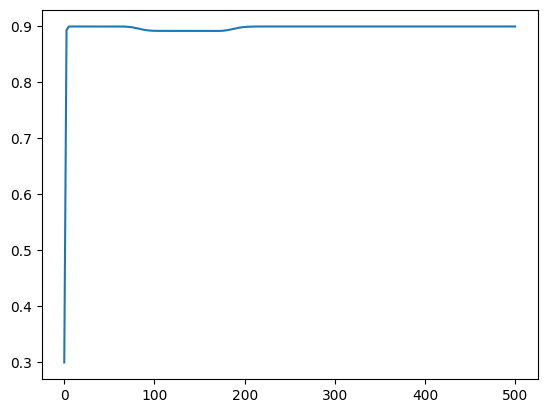

In [21]:
with output_data(path) as output:
    plt.plot(np.linspace(0, 500, 200), output["calcite"][:,10])

In [4]:
s = Scenario()

In [20]:
s.cAthy

5

In [21]:
s.phi0

0.6

In [7]:
def F(phi):
    return 1 - np.exp(-10 * (1 - phi) / phi)

In [8]:
F(s.phi0)

0.9987273661986602 <Unit('dimensionless')>

In [11]:
def cAthy(s: Scenario):
    return ((1 - s.phi0) * s.b * 9.81 * units['m/s²'] * s.rhow).to('cm⁻¹')

In [15]:
cAthy(Scenario(b=10 / units.kPa))

0.4014252 <Unit('1 / centimeter')>

In [16]:
def difpor(s: Scenario):
    return s.beta * s.phi0**3 / ((s.phi0 - s.phiinf) * cAthy(s))

In [17]:
difpor(s)

0.18240095286257774 <Unit('centimeter ** 2 / year')>

In [26]:
import pint

In [27]:
u = pint.UnitRegistry()

In [28]:
u.a

<Unit('year')>

In [29]:
u.M

<Unit('molar')>

In [30]:
u.kPa

<Unit('kilopascal')>

In [33]:
u['1']

1

In [35]:
u.cm / u.cm

<Unit('dimensionless')>

In [36]:
u.dimensionless

<Unit('dimensionless')>

In [37]:
u.mM

<Unit('millimolar')>

In [41]:
(3 * u.mM).to('M')

0.003 <Unit('molar')>